# 準備

## Googleドライブのマウント

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## sys.pathの設定

以下では，Googleドライブのマイドライブ直下にDNN_codeフォルダを置くことを仮定しています．必要に応じて，パスを変更してください．

In [2]:
import sys
sys.path.append('/content/drive/My Drive/Study-AI/step3')
sys.path.append('/content/drive/My Drive/Study-AI/step3/lesson_2')

# overfiting

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.14
                : 10. 正答率(テスト) = 0.1227
Generation: 20. 正答率(トレーニング) = 0.26666666666666666
                : 20. 正答率(テスト) = 0.199
Generation: 30. 正答率(トレーニング) = 0.3933333333333333
                : 30. 正答率(テスト) = 0.2797
Generation: 40. 正答率(トレーニング) = 0.4533333333333333
                : 40. 正答率(テスト) = 0.3406
Generation: 50. 正答率(トレーニング) = 0.52
                : 50. 正答率(テスト) = 0.3697
Generation: 60. 正答率(トレーニング) = 0.5533333333333333
                : 60. 正答率(テスト) = 0.4123
Generation: 70. 正答率(トレーニング) = 0.68
                : 70. 正答率(テスト) = 0.4933
Generation: 80. 正答率(トレーニング) = 0.6866666666666666
                : 80. 正答率(テスト) = 0.5165
Generation: 90. 正答率(トレーニング) = 0.73
                : 90. 正答率(テスト) = 0.5544
Generation: 100. 正答率(トレーニング) = 0.7666666666666667
                : 100. 正答率(テスト) = 0.5925
Generation: 110. 正答率(トレーニング) = 0.8066666666666666
                : 110. 正答率(テスト) = 0.5998
Generation: 120. 正答率(トレーニング) = 0.8166666666666667
             

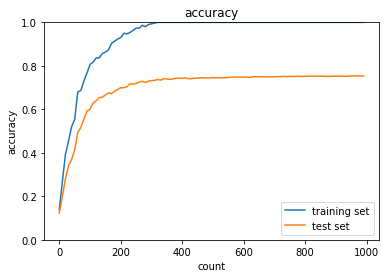

In [3]:
import numpy as np
from collections import OrderedDict
from common import layers
from data.mnist import load_mnist
import matplotlib.pyplot as plt
from multi_layer_net import MultiLayerNet
from common import optimizer


(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)
optimizer = optimizer.SGD(learning_rate=0.01)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## 考察
- 中間層を6層としたモデルでは、手描き文字に対して表現力が高すぎて過学習してしまう
- 学習データとテストデータに対する正答率がずっと乖離している

## weight decay
### L2

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.12666666666666668
                : 10. 正答率(テスト) = 0.1272
Generation: 20. 正答率(トレーニング) = 0.23
                : 20. 正答率(テスト) = 0.1829
Generation: 30. 正答率(トレーニング) = 0.30333333333333334
                : 30. 正答率(テスト) = 0.2454
Generation: 40. 正答率(トレーニング) = 0.36666666666666664
                : 40. 正答率(テスト) = 0.2987
Generation: 50. 正答率(トレーニング) = 0.46
                : 50. 正答率(テスト) = 0.3563
Generation: 60. 正答率(トレーニング) = 0.51
                : 60. 正答率(テスト) = 0.3884
Generation: 70. 正答率(トレーニング) = 0.57
                : 70. 正答率(テスト) = 0.4381
Generation: 80. 正答率(トレーニング) = 0.62
                : 80. 正答率(テスト) = 0.4775
Generation: 90. 正答率(トレーニング) = 0.6333333333333333
                : 90. 正答率(テスト) = 0.5044
Generation: 100. 正答率(トレーニング) = 0.6366666666666667
                : 100. 正答率(テスト) = 0.5096
Generation: 110. 正答率(トレーニング) = 0.66
                : 110. 正答率(テスト) = 0.5296
Generation: 120. 正答率(トレーニング) = 0.66
                : 120. 正答率(テスト) = 0.5367
Generation:

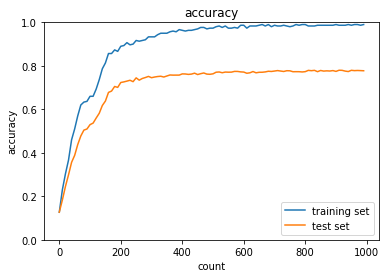

In [4]:
from common import optimizer

(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]


network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
weight_decay_lambda = 0.05
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * network.params['W' + str(idx)]
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += 0.5 * weight_decay_lambda * np.sqrt(np.sum(network.params['W' + str(idx)] ** 2))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               


lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## 考察
- L2ノルムによる重み減衰で過学習は若干改善される
- 正則化の強度を上げすぎると、反対に全く学習が進まなくなる

### L1

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.44333333333333336
                : 10. 正答率(テスト) = 0.3743
Generation: 20. 正答率(トレーニング) = 0.7133333333333334
                : 20. 正答率(テスト) = 0.5787
Generation: 30. 正答率(トレーニング) = 0.7566666666666667
                : 30. 正答率(テスト) = 0.6251
Generation: 40. 正答率(トレーニング) = 0.74
                : 40. 正答率(テスト) = 0.595
Generation: 50. 正答率(トレーニング) = 0.8066666666666666
                : 50. 正答率(テスト) = 0.6722
Generation: 60. 正答率(トレーニング) = 0.8766666666666667
                : 60. 正答率(テスト) = 0.7042
Generation: 70. 正答率(トレーニング) = 0.8366666666666667
                : 70. 正答率(テスト) = 0.6662
Generation: 80. 正答率(トレーニング) = 0.6633333333333333
                : 80. 正答率(テスト) = 0.553
Generation: 90. 正答率(トレーニング) = 0.8933333333333333
                : 90. 正答率(テスト) = 0.7146
Generation: 100. 正答率(トレーニング) = 0.57
                : 100. 正答率(テスト) = 0.4568
Generation: 110. 正答率(トレーニング) = 0.5266666666666666
                : 110. 正答率(テスト) = 0.4077
Generation: 120. 正答率(トレーニング) = 0.613

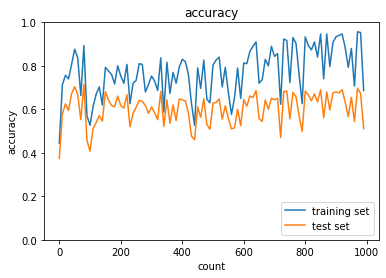

In [5]:
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
weight_decay_lambda = 0.007
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               
                
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## 考察
- L1ノルムによる重み減衰でも過学習は若干改善される
- 正則化の強度によっては学習が安定しない

## Dropout

In [6]:
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None

    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)

    def backward(self, dout):
        return dout * self.mask

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.12
                : 10. 正答率(テスト) = 0.1033
Generation: 20. 正答率(トレーニング) = 0.19666666666666666
                : 20. 正答率(テスト) = 0.1419
Generation: 30. 正答率(トレーニング) = 0.23666666666666666
                : 30. 正答率(テスト) = 0.178
Generation: 40. 正答率(トレーニング) = 0.2966666666666667
                : 40. 正答率(テスト) = 0.2119
Generation: 50. 正答率(トレーニング) = 0.3466666666666667
                : 50. 正答率(テスト) = 0.2508
Generation: 60. 正答率(トレーニング) = 0.4066666666666667
                : 60. 正答率(テスト) = 0.284
Generation: 70. 正答率(トレーニング) = 0.43666666666666665
                : 70. 正答率(テスト) = 0.3069
Generation: 80. 正答率(トレーニング) = 0.45666666666666667
                : 80. 正答率(テスト) = 0.3196
Generation: 90. 正答率(トレーニング) = 0.48
                : 90. 正答率(テスト) = 0.3593
Generation: 100. 正答率(トレーニング) = 0.5266666666666666
                : 100. 正答率(テスト) = 0.3981
Generation: 110. 正答率(トレーニング) = 0.5433333333333333
                : 110. 正答率(テスト) = 0.4094
Generation: 120. 正答率(トレーニング) = 0.

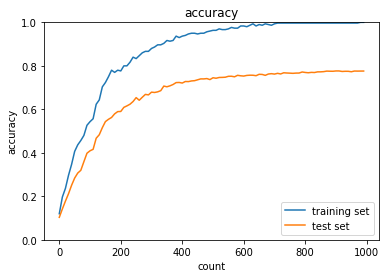

In [7]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.05
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda, use_dropout = use_dropout, dropout_ratio = dropout_ratio)
optimizer = optimizer.SGD(learning_rate=0.01)
# optimizer = optimizer.Momentum(learning_rate=0.01, momentum=0.9)
# optimizer = optimizer.AdaGrad(learning_rate=0.01)
# optimizer = optimizer.Adam()

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)    
    
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## 考察
- Dropoutでも過学習は若干改善される
- Ratioによっては学習が安定しない

## Dropout + L1

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.13333333333333333
                : 10. 正答率(テスト) = 0.1155
Generation: 20. 正答率(トレーニング) = 0.14666666666666667
                : 20. 正答率(テスト) = 0.1279
Generation: 30. 正答率(トレーニング) = 0.16333333333333333
                : 30. 正答率(テスト) = 0.1421
Generation: 40. 正答率(トレーニング) = 0.18666666666666668
                : 40. 正答率(テスト) = 0.1582
Generation: 50. 正答率(トレーニング) = 0.21
                : 50. 正答率(テスト) = 0.1783
Generation: 60. 正答率(トレーニング) = 0.2633333333333333
                : 60. 正答率(テスト) = 0.2144
Generation: 70. 正答率(トレーニング) = 0.3
                : 70. 正答率(テスト) = 0.2465
Generation: 80. 正答率(トレーニング) = 0.35
                : 80. 正答率(テスト) = 0.2713
Generation: 90. 正答率(トレーニング) = 0.4
                : 90. 正答率(テスト) = 0.3135
Generation: 100. 正答率(トレーニング) = 0.43333333333333335
                : 100. 正答率(テスト) = 0.3373
Generation: 110. 正答率(トレーニング) = 0.43
                : 110. 正答率(テスト) = 0.3481
Generation: 120. 正答率(トレーニング) = 0.46
                : 120. 正答率(テスト) = 0.37

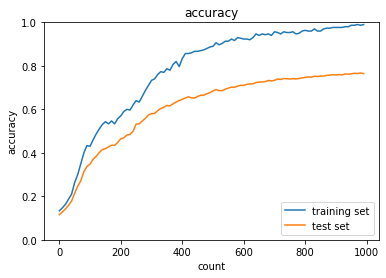

In [10]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.08
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        use_dropout = use_dropout, dropout_ratio = dropout_ratio)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []
hidden_layer_num = network.hidden_layer_num

plot_interval=10

# 正則化強度設定 ======================================
weight_decay_lambda=0.002
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## 考察
- DropoutとL1の組み合わせでも過学習は多少改善される
- 正則化強度が大きすぎると学習が進まない
- 正則化も重要だが、データにあったモデル（隠れ層の数など）が重要と考えられる